In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Looks Like there is Null Values in 'AGE','CABIN','EMBARKED' columns

<Axes: >

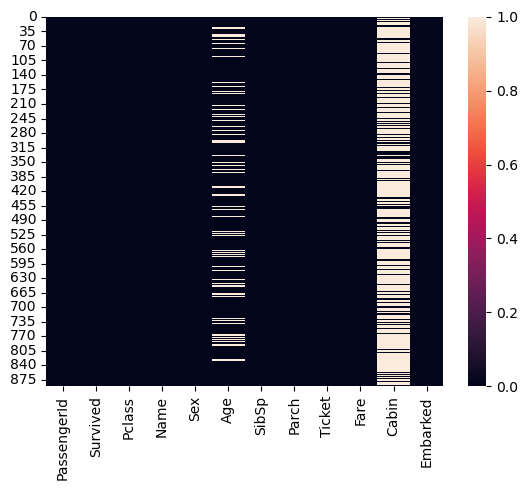

In [8]:
sns.heatmap(titanic.isnull())

In [9]:
# HANDLING THE MISSING VALUES

In [10]:
# Droping the cabin Column from the DataFrame
# We are dropping Cabin Column because there is huge number of null values and if we use mode feature there it will create missunderstanding and 
# effect our model
titanic=titanic.drop(columns='Cabin',axis=1)

In [11]:
# Replacing the missing values in "Age" Column with Mean Values
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [12]:
# Finding The Mode Value "Embarked" Columns
print(titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [13]:
print(titanic['Embarked'].mode()[0])

S


In [14]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
#DATA ANALYSIS

In [18]:
# Getting some Statistics Measure of Dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# Looks like there is Outliers in Age Columns because there is huge difference in Minimum and Maximum Column 
# But we have provided mean values there thats why we don't need to remove outliers from that

In [20]:
# Finding the number of people survived and not survived

In [21]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [22]:
# DATA VISUALIZATION

In [23]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

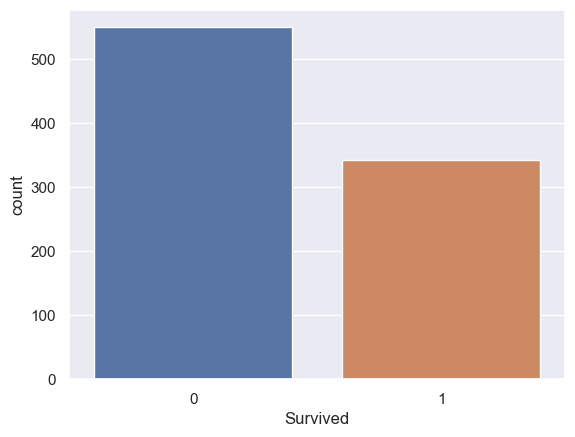

In [24]:
# Making a count Plot for "Survived" Column
sns.countplot(data=titanic,x="Survived")

In [25]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

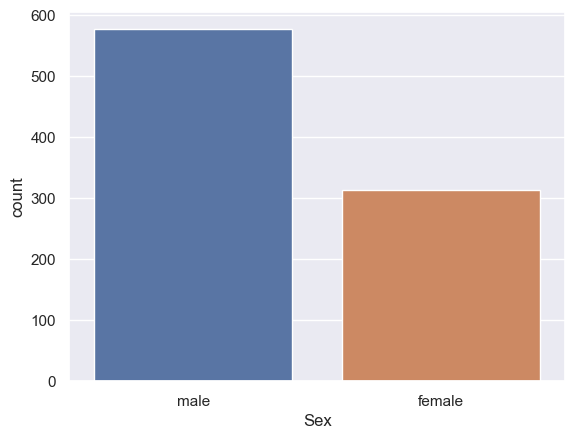

In [26]:
sns.countplot(data=titanic,x='Sex')

<Axes: xlabel='Survived', ylabel='count'>

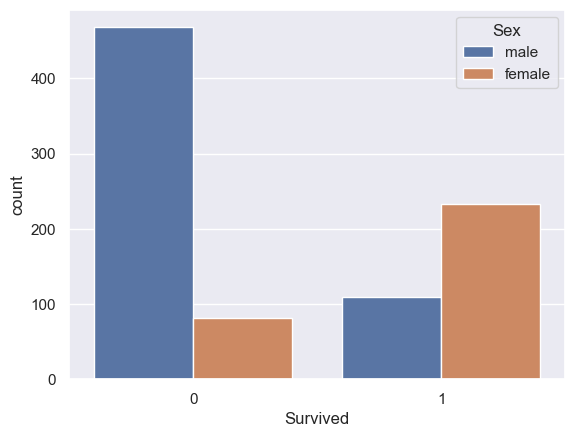

In [27]:
sns.countplot(data=titanic,x='Survived',hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

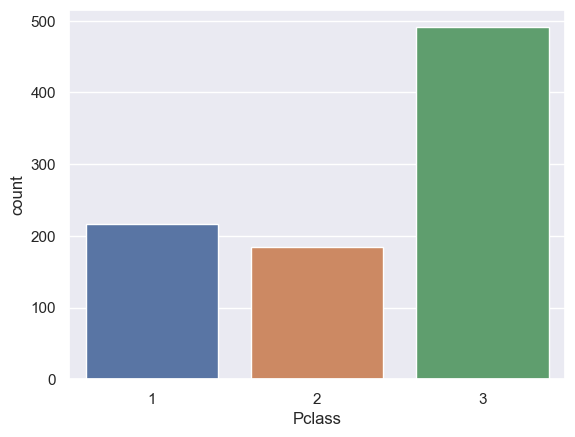

In [28]:
sns.countplot(data=titanic,x='Pclass')

In [29]:
# Lets Check Survived people Class wise

AttributeError: 'numpy.int64' object has no attribute 'startswith'

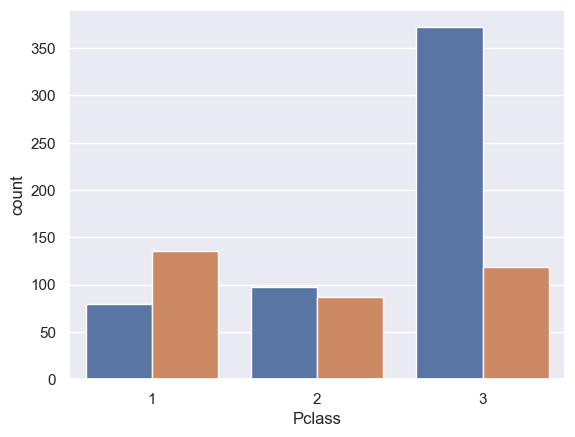

In [30]:
sns.countplot(data=titanic,x='Pclass',hue="Survived")

In [31]:
# ENCODING THE CATEGORICAL COLUMNS

In [32]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [33]:
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [34]:
# Converting Categorical Columns
# This is converting for better understanding and make categorical Columns into Numerical Column

In [35]:
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,"C":1,"Q":2}},inplace= True)

In [36]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,1


In [37]:
# Seprate the Columns

In [38]:
x=titanic.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=titanic['Survived']

In [39]:
x.shape

(891, 7)

In [40]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [41]:
y.shape

(891,)

In [42]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [43]:
# IMPORTING MACHINE LEARNING LIBRARIES
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score
from sklearn.model_selection import train_test_split

In [44]:
# Splitting the data into training data & Testing Data

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=49)

In [46]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (623, 7) (268, 7)


In [47]:
KNN=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
LR=LogisticRegression()
RFC=RandomForestClassifier()
GNB=GaussianNB()
model=[KNN,DTC,LR,RFC,GNB]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score -->",m,accuracy_score(y_test,predm))
    print("Confusion Matix -->",confusion_matrix(y_test,predm))
    print("Classification Report -->",classification_report(y_test,predm))
    print("Recall Score -->",recall_score(y_test,predm))
    print('\n')

Accuracy Score --> KNeighborsClassifier() 0.7276119402985075
Confusion Matix --> [[142  36]
 [ 37  53]]
Classification Report -->               precision    recall  f1-score   support

           0       0.79      0.80      0.80       178
           1       0.60      0.59      0.59        90

    accuracy                           0.73       268
   macro avg       0.69      0.69      0.69       268
weighted avg       0.73      0.73      0.73       268

Recall Score --> 0.5888888888888889


Accuracy Score --> DecisionTreeClassifier() 0.7947761194029851
Confusion Matix --> [[149  29]
 [ 26  64]]
Classification Report -->               precision    recall  f1-score   support

           0       0.85      0.84      0.84       178
           1       0.69      0.71      0.70        90

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.80      0.79      0.80       268

Recall Score --> 0.7111111111111111


Accuracy

In [48]:
# IT is showing that our best model is RandomForestClassifier & Logistic Regression
# RandomForestClassifier has most Accuracy Score & Logistic Regression's Accuracy Score is 2nd best

In [49]:
# Lets Check it by Cross Validation 

In [50]:
from sklearn .model_selection import cross_val_score

In [51]:
# Cross-validation for KNN
scores = cross_val_score(KNN, x_train, y_train, cv=5)
print("Cross-validation scores --> KNN", scores)
print("Mean cross-validation score --> KNN", scores.mean())
print('\n')

# Cross-validation for Decision Tree
scores = cross_val_score(DTC, x_train, y_train, cv=5)
print("Cross-validation scores --> DTC", scores)
print("Mean cross-validation score --> DTC", scores.mean())
print('\n')


# Cross-validation for Logistic Regression
scores = cross_val_score(LR, x_train, y_train, cv=5)
print("Cross-validation scores --> LR", scores)
print("Mean cross-validation score --> LR", scores.mean())
print('\n')

# Cross-validation for Random Forest
scores = cross_val_score(RFC, x_train, y_train, cv=5)
print("Cross-validation scores --> RFC", scores)
print("Mean cross-validation score --> RFC", scores.mean())
print('\n')

# Cross-validation for GaussianNB
scores = cross_val_score(GNB, x_train, y_train, cv=5)
print("Cross-validation scores --> GNB", scores)
print("Mean cross-validation score --> GNB", scores.mean())
print('\n')

Cross-validation scores --> KNN [0.688      0.664      0.632      0.76612903 0.64516129]
Mean cross-validation score --> KNN 0.679058064516129


Cross-validation scores --> DTC [0.704      0.752      0.68       0.79032258 0.70967742]
Mean cross-validation score --> DTC 0.7272000000000001


Cross-validation scores --> LR [0.84       0.792      0.784      0.76612903 0.75806452]
Mean cross-validation score --> LR 0.7880387096774195


Cross-validation scores --> RFC [0.816      0.76       0.768      0.82258065 0.72580645]
Mean cross-validation score --> RFC 0.7784774193548388


Cross-validation scores --> GNB [0.824      0.776      0.776      0.76612903 0.77419355]
Mean cross-validation score --> GNB 0.7832645161290323




In [52]:
# BY CHECKING CROSS VALIDATION WE GET TO KNOW THAT OUR BEST MODEL IS LOGISTIC REGRESION & RANDOM FOREST CLASSIFIER

In [53]:
# WE USE LOGISTIC REGRESSION THERE FOR MAKING PREDICTION

In [54]:
model=LogisticRegression()

In [55]:
model.fit(x_train,y_train)

LogisticRegression()

In [56]:
training_data_prediction=model.predict(x_test)

In [57]:
# LETS HYPERTUNE OUR MODEL

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [59]:
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [60]:
LR_search = GridSearchCV(LR, param_grid=LRparam_grid,cv=5)

In [61]:
LR_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [62]:
LR_search.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [63]:
Final_model=LogisticRegression(C= 0.1, penalty= 'l2', solver= 'newton-cg')
Final_model.fit(x_train,y_train)
predgcv=Final_model.predict(x_test)
acc=accuracy_score(y_test,predgcv)
print("Accuracy Score: -",acc*100)

Accuracy Score: - 80.59701492537313


In [64]:
import joblib

In [65]:
joblib.dump(Final_model,'Survived.pkl')

['Survived.pkl']

In [66]:
model=joblib.load("Survived.pkl")
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1], dtype=int64)

In [67]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
263,0,0
264,0,1
265,1,0
266,0,0


# THANKYOU